In [1]:
import pandas as pd
import glob

In [3]:
df = pd.read_csv('sindrome808-collection-20221010-1048.csv')

In [4]:
df.head()

,Catalog#,Artist,Title,Label,Format,Rating,Released,release_id,CollectionFolder,Date Added,Collection Media Condition,Collection Sleeve Condition,Collection Notes
0,ISLE004,Ramzi,Pèze-Piton,12th Isle,"LP, Album",NaN,2017,11238408,Uncategorized,2022-04-01 05:29:11,Very Good Plus (VG+),NaN,NaN
1,ISLE007,Lo Kindre,Chlorophytum,12th Isle,"12"", EP",NaN,2019,13039009,Uncategorized,2020-09-06 14:06:12,Near Mint (NM or M-),Near Mint (NM or M-),NaN
2,ISLE008.5,D.K. (10),Live At The Edge,12th Isle,LP,NaN,2020,14694990,Uncategorized,2022-02-23 00:06:20,NaN,NaN,NaN
3,ISLE009,Vague Imaginaires,L'Île Sous l'Eau,12th Isle,"12"", EP",NaN,2020,15489480,Uncategorized,2021-07-05 01:40:48,NaN,NaN,NaN
4,825646997633,Biffy Clyro,Puzzle,14th Floor Records,"CD, Album, RE",NaN,0,12351357,Uncategorized,2022-03-04 15:25:22,NaN,NaN,NaN


In [5]:
from collections import Counter

w = Counter(df['Label'].str.lower())

In [6]:
w

Counter({'12th isle': 4,
         '14th floor records': 1,
         '14th floor records, warner bros. records': 1,
         '2nd drop records': 2,
         '3024': 1,
         '4ad': 4,
         '5 gate temple': 3,
         '679, 679, locked on': 1,
         '81': 2,
         'aba-shanti-i': 3,
         'accidental meetings': 3,
         'ad 93': 2,
         'adria costa records, unlimited struggle records': 1,
         'afu limited': 2,
         'aggrovator': 1,
         'anno (2)': 1,
         'ans': 1,
         'ansia': 3,
         'anti-': 1,
         'apollo': 1,
         'artetetra, communion (2)': 1,
         'attack gold': 1,
         'aus music': 1,
         'avon terror corps': 2,
         'backwards': 1,
         'bandulu records': 1,
         'baroque sunburst': 1,
         'basic channel': 1,
         'basic replay, crat': 1,
         'basic replay, intelitec muzik': 2,
         'basic replay, king culture': 1,
         'bedouin records': 2,
         'berceuse heroique': 3

In [9]:
q = Counter({k: c for k, c in w.items() if c >=4 })

<BarContainer object of 21 artists>

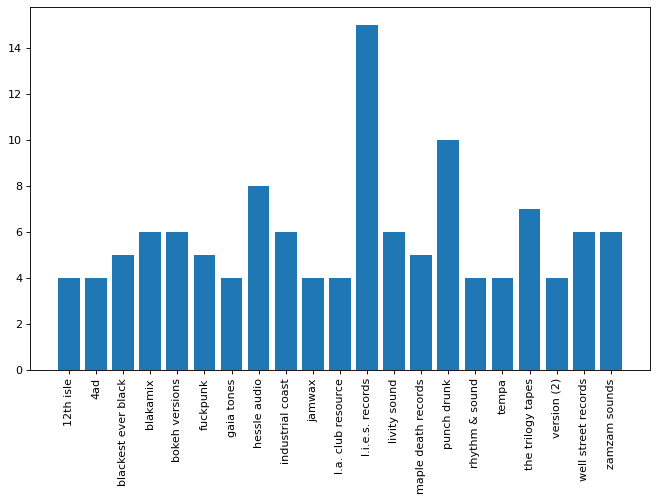

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation='vertical')

plt.bar(q.keys(), q.values())

In [11]:
from collections import Counter

w = Counter(df['Artist'].str.lower())

In [16]:
q = Counter({k: c for k, c in w.items() if c >=4 })

<BarContainer object of 10 artists>

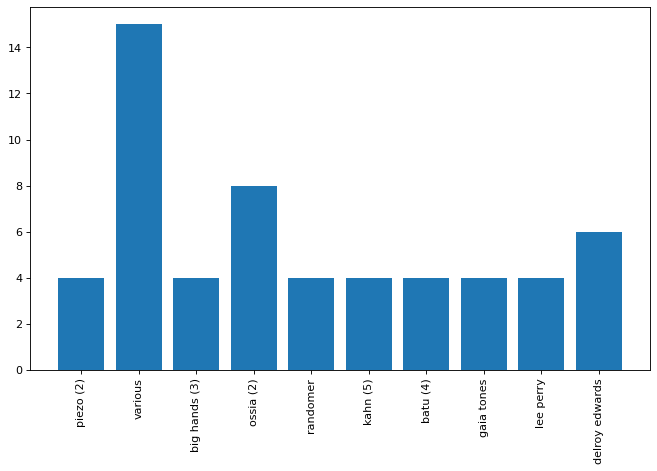

In [17]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation='vertical')

plt.bar(q.keys(), q.values())

In [18]:
import requests
import discogs_client
d = discogs_client.Client('tracklist_explorer', user_token='TQnLrfoPbUSIPjrwWqIkZSkuJczEwsHtQXbdegwL')

In [19]:
release = d.release(11238408)

In [45]:
releases_styles = {}
releases = {}

for index, row in df.iterrows():
    release = d.release(row['release_id'])
    releases[row['release_id']] = release
    if release.styles is not None:
        releases_styles[row['release_id']] = release.styles

In [46]:
with open('releases_styles.json', 'w') as fp:
    json.dump(releases_styles, fp, indent=4)

In [47]:
with open('releases_styles.json', 'r') as fp:
    data = json.load(fp)

In [48]:
data

{'11238408': ['Experimental', 'Dub', 'Future Jazz'],
 '13039009': ['Experimental', 'Dub', 'Leftfield', 'Drone'],
 '14694990': ['Abstract', 'Downtempo', 'Techno', 'Trance'],
 '15489480': ['Abstract', 'Techno', 'Field Recording', 'Ambient'],
 '12351357': ['Indie Rock'],
 '2168924': ['Alternative Rock', 'Indie Rock'],
 '1549691': ['Broken Beat', 'Dubstep'],
 '1792348': ['Dubstep'],
 '14711491': ['Breakbeat', 'Techno'],
 '8865533': ['Alternative Rock', 'Indie Rock'],
 '22214308': ['Ethereal', 'Dream Pop'],
 '6568981': ['Alternative Rock', 'Noise', 'Indie Rock'],
 '5923509': ['Alternative Rock', 'Indie Rock'],
 '23927285': ['Experimental'],
 '14428562': ['Dub', 'Techno'],
 '16430406': ['Dub'],
 '45155': ['UK Garage'],
 '7042825': ['House', 'Experimental', 'Techno'],
 '12974773': ['Grime', 'Dubstep'],
 '14158211': ['Roots Reggae', 'Dub'],
 '15917858': ['Roots Reggae', 'Dub'],
 '15917859': ['Roots Reggae', 'Dub'],
 '17945290': ['Ambient', 'Dub Techno', 'Downtempo', 'Field Recording'],
 '21261

In [49]:
flatten_genres = data.values()

In [50]:
list(data.values())

[['Experimental', 'Dub', 'Future Jazz'],
 ['Experimental', 'Dub', 'Leftfield', 'Drone'],
 ['Abstract', 'Downtempo', 'Techno', 'Trance'],
 ['Abstract', 'Techno', 'Field Recording', 'Ambient'],
 ['Indie Rock'],
 ['Alternative Rock', 'Indie Rock'],
 ['Broken Beat', 'Dubstep'],
 ['Dubstep'],
 ['Breakbeat', 'Techno'],
 ['Alternative Rock', 'Indie Rock'],
 ['Ethereal', 'Dream Pop'],
 ['Alternative Rock', 'Noise', 'Indie Rock'],
 ['Alternative Rock', 'Indie Rock'],
 ['Experimental'],
 ['Dub', 'Techno'],
 ['Dub'],
 ['UK Garage'],
 ['House', 'Experimental', 'Techno'],
 ['Grime', 'Dubstep'],
 ['Roots Reggae', 'Dub'],
 ['Roots Reggae', 'Dub'],
 ['Roots Reggae', 'Dub'],
 ['Ambient', 'Dub Techno', 'Downtempo', 'Field Recording'],
 ['Techno'],
 ['Ambient', 'Experimental', 'Leftfield'],
 ['Breakbeat', 'Tribal', 'Techno'],
 ['House', 'Minimal', 'Trance'],
 ['Acid', 'Techno'],
 ['Techno', 'Acid'],
 ['Roots Reggae'],
 ['Techno', 'Experimental', 'Ambient'],
 ['Techno', 'Tech House', 'House', 'Ambient', '

In [51]:
import itertools

print(list(itertools.chain.from_iterable(data.values())))

['Experimental', 'Dub', 'Future Jazz', 'Experimental', 'Dub', 'Leftfield', 'Drone', 'Abstract', 'Downtempo', 'Techno', 'Trance', 'Abstract', 'Techno', 'Field Recording', 'Ambient', 'Indie Rock', 'Alternative Rock', 'Indie Rock', 'Broken Beat', 'Dubstep', 'Dubstep', 'Breakbeat', 'Techno', 'Alternative Rock', 'Indie Rock', 'Ethereal', 'Dream Pop', 'Alternative Rock', 'Noise', 'Indie Rock', 'Alternative Rock', 'Indie Rock', 'Experimental', 'Dub', 'Techno', 'Dub', 'UK Garage', 'House', 'Experimental', 'Techno', 'Grime', 'Dubstep', 'Roots Reggae', 'Dub', 'Roots Reggae', 'Dub', 'Roots Reggae', 'Dub', 'Ambient', 'Dub Techno', 'Downtempo', 'Field Recording', 'Techno', 'Ambient', 'Experimental', 'Leftfield', 'Breakbeat', 'Tribal', 'Techno', 'House', 'Minimal', 'Trance', 'Acid', 'Techno', 'Techno', 'Acid', 'Roots Reggae', 'Techno', 'Experimental', 'Ambient', 'Techno', 'Tech House', 'House', 'Ambient', 'Deep House', 'Dubstep', 'House', 'Techno', 'Techno', 'Broken Beat', 'Contemporary Jazz', 'IDM'

In [53]:
genres_counter = Counter(list(itertools.chain.from_iterable(data.values())))
genres_counter

Counter({'Experimental': 97,
         'Dub': 118,
         'Future Jazz': 2,
         'Leftfield': 32,
         'Drone': 16,
         'Abstract': 34,
         'Downtempo': 12,
         'Techno': 147,
         'Trance': 2,
         'Field Recording': 7,
         'Ambient': 50,
         'Indie Rock': 18,
         'Alternative Rock': 18,
         'Broken Beat': 6,
         'Dubstep': 56,
         'Breakbeat': 15,
         'Ethereal': 1,
         'Dream Pop': 2,
         'Noise': 23,
         'UK Garage': 7,
         'House': 43,
         'Grime': 17,
         'Roots Reggae': 37,
         'Dub Techno': 22,
         'Tribal': 19,
         'Minimal': 8,
         'Acid': 13,
         'Tech House': 2,
         'Deep House': 8,
         'Contemporary Jazz': 1,
         'IDM': 9,
         'Avantgarde': 4,
         'Industrial': 35,
         'Rhythmic Noise': 4,
         'Darkwave': 2,
         'Post-Punk': 8,
         'Free Improvisation': 1,
         'Free Jazz': 1,
         'Electro': 21,
    

In [57]:
q = Counter({k: c for k, c in genres_counter.items() if c >=20 })
q

Counter({'Experimental': 97,
         'Dub': 118,
         'Leftfield': 32,
         'Abstract': 34,
         'Techno': 147,
         'Ambient': 50,
         'Dubstep': 56,
         'Noise': 23,
         'House': 43,
         'Roots Reggae': 37,
         'Dub Techno': 22,
         'Industrial': 35,
         'Electro': 21,
         'Dancehall': 21})

<BarContainer object of 14 artists>

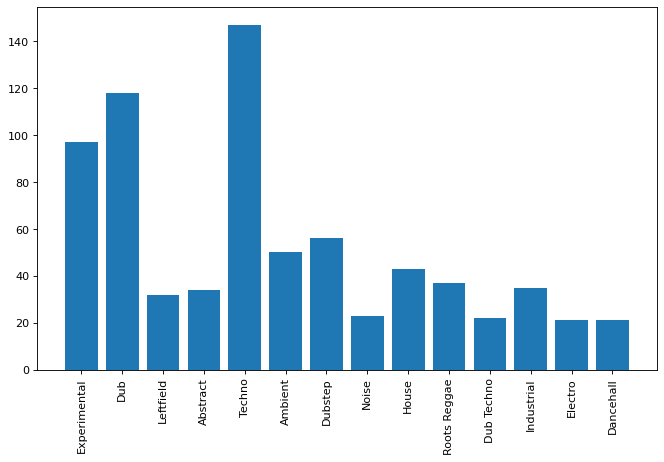

In [58]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(rotation='vertical')

plt.bar(q.keys(), q.values())